In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/schizophrenia/dataverse_files'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/schizophrenia/dataverse_files/h09.edf
/kaggle/input/schizophrenia/dataverse_files/h07.edf
/kaggle/input/schizophrenia/dataverse_files/s10.edf
/kaggle/input/schizophrenia/dataverse_files/s08.edf
/kaggle/input/schizophrenia/dataverse_files/s06.edf
/kaggle/input/schizophrenia/dataverse_files/h04.edf
/kaggle/input/schizophrenia/dataverse_files/MANIFEST.TXT
/kaggle/input/schizophrenia/dataverse_files/h01.edf
/kaggle/input/schizophrenia/dataverse_files/s01.edf
/kaggle/input/schizophrenia/dataverse_files/h13.edf
/kaggle/input/schizophrenia/dataverse_files/s09.edf
/kaggle/input/schizophrenia/dataverse_files/s05.edf
/kaggle/input/schizophrenia/dataverse_files/h10.edf
/kaggle/input/schizophrenia/dataverse_files/s02.edf
/kaggle/input/schizophrenia/dataverse_files/s07.edf
/kaggle/input/schizophrenia/dataverse_files/s14.edf
/kaggle/input/schizophrenia/dataverse_files/s13.edf
/kaggle/input/schizophrenia/dataverse_files/h14.edf
/kaggle/input/schizophrenia/dataverse_files/s04.edf
/kaggle

In [4]:
!pip install mne 

In [5]:
from glob import glob
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

2024-05-17 18:56:31.139959: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 18:56:31.140145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 18:56:31.348396: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
#read all file
import glob
all_files_path=glob.glob('/kaggle/input/schizophrenia/dataverse_files/*')
print(all_files_path)

['/kaggle/input/schizophrenia/dataverse_files/h09.edf', '/kaggle/input/schizophrenia/dataverse_files/h07.edf', '/kaggle/input/schizophrenia/dataverse_files/s10.edf', '/kaggle/input/schizophrenia/dataverse_files/s08.edf', '/kaggle/input/schizophrenia/dataverse_files/s06.edf', '/kaggle/input/schizophrenia/dataverse_files/h04.edf', '/kaggle/input/schizophrenia/dataverse_files/MANIFEST.TXT', '/kaggle/input/schizophrenia/dataverse_files/h01.edf', '/kaggle/input/schizophrenia/dataverse_files/s01.edf', '/kaggle/input/schizophrenia/dataverse_files/h13.edf', '/kaggle/input/schizophrenia/dataverse_files/s09.edf', '/kaggle/input/schizophrenia/dataverse_files/s05.edf', '/kaggle/input/schizophrenia/dataverse_files/h10.edf', '/kaggle/input/schizophrenia/dataverse_files/s02.edf', '/kaggle/input/schizophrenia/dataverse_files/s07.edf', '/kaggle/input/schizophrenia/dataverse_files/s14.edf', '/kaggle/input/schizophrenia/dataverse_files/s13.edf', '/kaggle/input/schizophrenia/dataverse_files/h14.edf', '/ka

In [7]:
all_files_path[0]

'/kaggle/input/schizophrenia/dataverse_files/h09.edf'

In [8]:
healthy_file_path=[i for i in all_files_path if  'h' in i.split('s/')[1]]
patient_file_path=[i for i in all_files_path if  's' in i.split('s/')[1]]
healthy_file_path

['/kaggle/input/schizophrenia/dataverse_files/h09.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h07.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h04.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h01.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h13.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h10.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h14.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h12.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h05.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h03.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h02.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h08.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h11.edf',
 '/kaggle/input/schizophrenia/dataverse_files/h06.edf']

In [9]:
def read_data(file_path):
    datax=mne.io.read_raw_edf(file_path,preload=True)
    datax.set_eeg_reference()
    datax.filter(l_freq=1,h_freq=45)
    epochs=mne.make_fixed_length_epochs(datax,duration=25,overlap=0)
    epochs=epochs.get_data()
    return epochs #trials,channel,length

In [10]:
data=read_data(healthy_file_path[0])

Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [11]:
data.shape

(36, 19, 6250)

In [12]:
control_epochs_array=[read_data(subject) for subject in healthy_file_path]
patients_epochs_array=[read_data(subject) for subject in patient_file_path]

Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 226249  =      0.000 ...   904.996 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h04.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h01.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h13.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h10.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 44 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h14.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h12.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h05.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h03.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h02.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h08.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h11.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/h06.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 37 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s10.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
34 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 34 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s08.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
36 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 36 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s06.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
29 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 29 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s01.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
33 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 33 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s09.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
47 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 47 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s05.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
35 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 35 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s02.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s07.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
53 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 53 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s14.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
86 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 86 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/sc

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s04.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
48 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 48 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s11.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
54 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 54 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s03.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
38 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 38 events and 6250 original time points ...
0 bad epochs dropped
Extracting EDF parameters from /kaggle/input/schizophrenia/dataverse_files/s12.edf...
EDF file detected
Setting channel inf

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 825 samples (3.300 s)

Not setting metadata
43 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 43 events and 6250 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


In [13]:
control_epochs_labels=[len(i)*[0] for i in control_epochs_array]
patients_epochs_labels=[len(i)*[1] for i in patients_epochs_array]
print(len(control_epochs_labels),len(patients_epochs_labels))

14 14


In [14]:
data_list=control_epochs_array+patients_epochs_array
label_list=control_epochs_labels+patients_epochs_labels
print(len(data_list),len(label_list))

28 28


In [15]:
groups_list=[[i]*len(j) for i, j in enumerate(data_list)]

In [16]:
data_array=np.vstack(data_list)
label_array=np.hstack(label_list)
group_array=np.hstack(groups_list)
data_array=np.moveaxis(data_array,1,2)

print(data_array.shape,label_array.shape,group_array.shape)

(1142, 6250, 19) (1142,) (1142,)


In [17]:
from sklearn.model_selection import train_test_split
from scipy.signal import resample
import numpy as np
import random
import matplotlib.pyplot as plt

In [18]:
# Define the number of iterations and the test size
num_iterations = 10  # Number of iterations
test_size = 0.2  # Size of the test set

# Initialize a list to store the evaluation scores
evaluation_scores = []

# Initialize lists to store per-fold accuracies
per_fold_accuracies = []

In [19]:
# Perform repeated random sub-sampling validation
for i in range(num_iterations):
    # Split the data into train/validation and test sets
    X_train_val, X_test, y_train_val, y_test = train_test_split(data_array, label_array, test_size=test_size, random_state=i)


In [20]:
# Further split train/validation into separate sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=i)

In [21]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val_scaled = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [22]:
# Define data augmentation function
def augment_data(X, target_length):
    augmented_X = []
    for sample in X:
        # Apply time warping augmentation
        augmented_sample = apply_time_warping(sample, target_length)
        # Add more augmentation techniques here if needed
        # For example: adding noise, random cropping, etc.
        augmented_X.append(augmented_sample)
    return np.array(augmented_X)

# Function to apply time warping to each sample
def apply_time_warping(sample, target_length):
    # Implement time warping here (e.g., stretching or compressing the time axis)
    # Example:
    stretched_sample = resample(sample, target_length)
    return stretched_sample

# Set target length for augmented samples
target_length = 6250  # Assuming the original sample length is 6250

# Apply data augmentation to training data
X_train_augmented = augment_data(X_train_scaled, target_length)

# Combine augmented data with original training data
X_train_combined = np.concatenate((X_train_scaled, X_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train, y_train), axis=0)

# Shuffle combined data
combined_data = list(zip(X_train_combined, y_train_combined))
random.shuffle(combined_data)
X_train_combined, y_train_combined = zip(*combined_data)

In [23]:
from tensorflow.keras.layers import Conv1D,BatchNormalization,LeakyReLU,MaxPool1D,\
GlobalAveragePooling1D,Dense,Dropout,AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
def cnnmodel():
    clear_session()
    model=Sequential()
    model.add(Conv1D(filters=5,kernel_size=3,strides=1,input_shape=(6250,19)))#1
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#2
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#3
    model.add(LeakyReLU())
    model.add(MaxPool1D(pool_size=2,strides=2))#4
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#5
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#6
    model.add(Dropout(0.5))
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#7
    model.add(LeakyReLU())
    model.add(AveragePooling1D(pool_size=2,strides=2))#8
    model.add(Conv1D(filters=5,kernel_size=3,strides=1))#9
    model.add(LeakyReLU())
    model.add(GlobalAveragePooling1D())#10
    model.add(Dense(1,activation='sigmoid'))#11
    
    model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

model=cnnmodel()
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 6248, 5)        │           290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 6248, 5)        │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 6248, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3124, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3122, 5)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 3122, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1561, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1561, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 1559, 5)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 1559, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d               │ (None, 779, 5)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 779, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 777, 5)         │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 777, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling1d_1             │ (None, 388, 5)         │             0 │
│ (AveragePooling1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 386, 5)         │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 386, 5)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 5)              │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636 (2.48 KB)

 Trainable params: 626 (2.45 KB)

 Non-trainable params: 10 (40.00 B)

In [24]:
from sklearn.metrics import accuracy_score

# Train the model on the training data
history = model.fit(X_train_scaled, y_train, epochs=60, batch_size=128, validation_data=(X_val_scaled, y_val))
    
# Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)
score = accuracy_score(y_test, np.round(y_pred))
    
# Append the score to the list of evaluation scores
evaluation_scores.append(score)

# Append per-fold accuracy to the list
per_fold_accuracies.append(history.history['val_accuracy'])

# Compute the average evaluation score
average_score = sum(evaluation_scores) / len(evaluation_scores)

print("Average Accuracy:", average_score)


Epoch 1/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 411ms/step - accuracy: 0.4616 - loss: 0.6945 - val_accuracy: 0.6196 - val_loss: 0.6727
Epoch 2/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 324ms/step - accuracy: 0.5562 - loss: 0.6851 - val_accuracy: 0.6196 - val_loss: 0.6612
Epoch 3/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 384ms/step - accuracy: 0.5493 - loss: 0.6796 - val_accuracy: 0.6196 - val_loss: 0.6513
Epoch 4/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 317ms/step - accuracy: 0.5416 - loss: 0.6764 - val_accuracy: 0.6196 - val_loss: 0.6440
Epoch 5/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.5558 - loss: 0.6702 - val_accuracy: 0.6196 - val_loss: 0.6375
Epoch 6/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - accuracy: 0.5517 - loss: 0.6668 - val_accuracy: 0.6196 - val_loss: 0.6329
Epoch 7/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 328ms/step - accuracy: 0.5563 - loss: 0.6617 - val_accuracy: 0.6196 - val_loss: 0.6288
Epoch 8/60
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 327ms/step - accuracy: 0.5612 - loss: 0.6514 - val_accuracy: 0.6196 - val_loss:

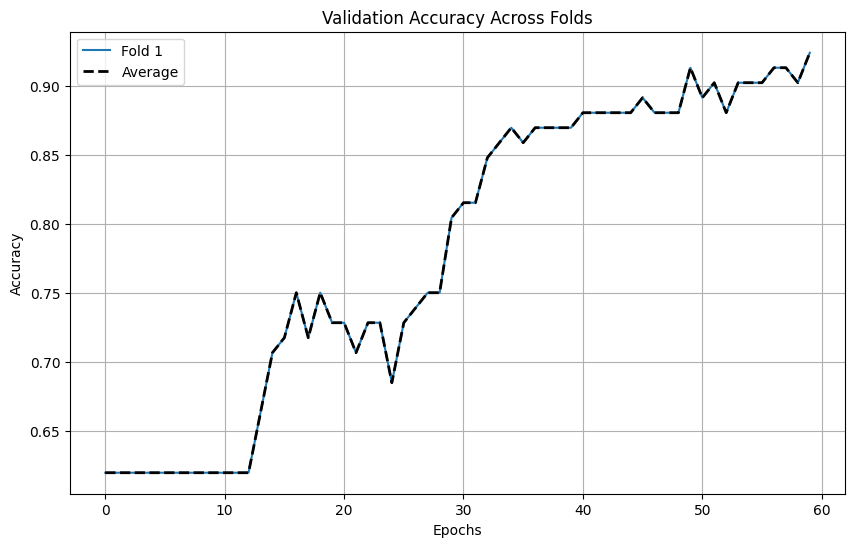

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Plot per-fold accuracies
plt.figure(figsize=(10, 6))
for fold, acc in enumerate(per_fold_accuracies, 1):
    plt.plot(acc, label=f'Fold {fold}')

# Pad the accuracy lists with NaNs to make them all the same length
max_epochs = max(len(acc) for acc in per_fold_accuracies)
padded_accuracies = [acc + [np.nan] * (max_epochs - len(acc)) for acc in per_fold_accuracies]

# Calculate average accuracy
avg_acc = np.nanmean(padded_accuracies, axis=0)

# Plot average accuracy
plt.plot(avg_acc, label='Average', linestyle='--', linewidth=2, color='black')

plt.title('Validation Accuracy Across Folds')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)


train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
print("Train Accuracy:", train_accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9354 - loss: 0.2179
Test Accuracy: 0.9301310181617737
Train Accuracy: 0.9342265725135803


In [27]:
from keras.models import load_model
import numpy as np

model.save('my_model.h5')


loaded_model = load_model('my_model.h5')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Threshold: 0.35, F-measure: 0.9048
Threshold: 0.35
Accuracy: 0.8952
Sensitivity (TPR/Recall): 0.9744
Specificity (TNR): 0.8125
False Positive Rate (FPR): 0.1875
F-measure: 0.9048
------------------------------


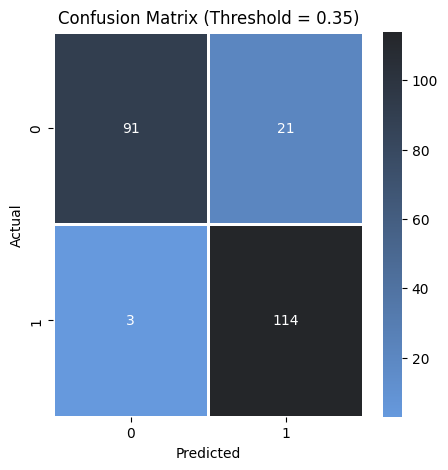

Threshold: 0.40, F-measure: 0.9120
Threshold: 0.40
Accuracy: 0.9039
Sensitivity (TPR/Recall): 0.9744
Specificity (TNR): 0.8304
False Positive Rate (FPR): 0.1696
F-measure: 0.9120
------------------------------


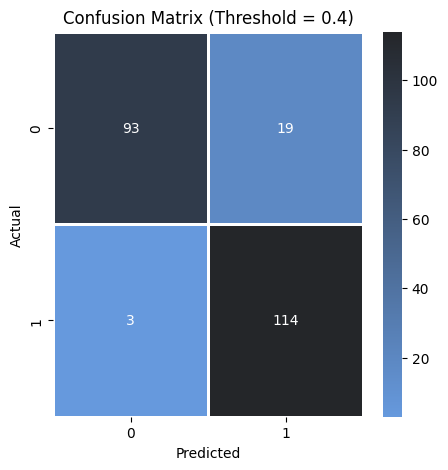

Threshold: 0.54, F-measure: 0.9378
Threshold: 0.54
Accuracy: 0.9345
Sensitivity (TPR/Recall): 0.9658
Specificity (TNR): 0.9018
False Positive Rate (FPR): 0.0982
F-measure: 0.9378
------------------------------


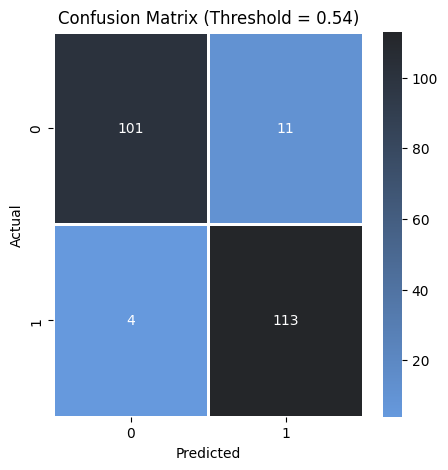

Threshold: 0.80, F-measure: 0.9422
Threshold: 0.80
Accuracy: 0.9432
Sensitivity (TPR/Recall): 0.9060
Specificity (TNR): 0.9821
False Positive Rate (FPR): 0.0179
F-measure: 0.9422
------------------------------


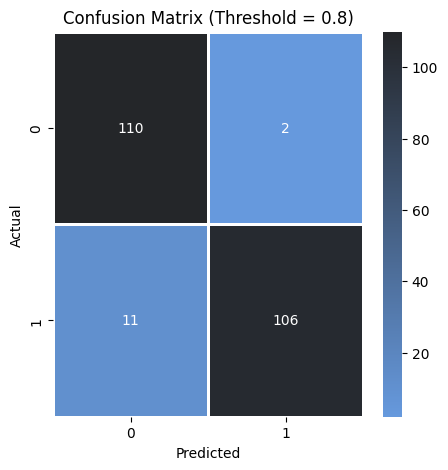

Threshold: 0.89, F-measure: 0.9124
Threshold: 0.89
Accuracy: 0.9170
Sensitivity (TPR/Recall): 0.8462
Specificity (TNR): 0.9911
False Positive Rate (FPR): 0.0089
F-measure: 0.9124
------------------------------


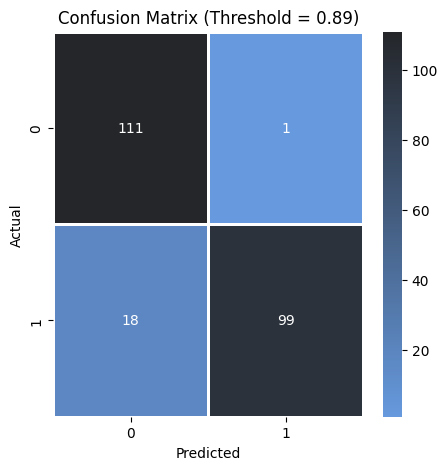

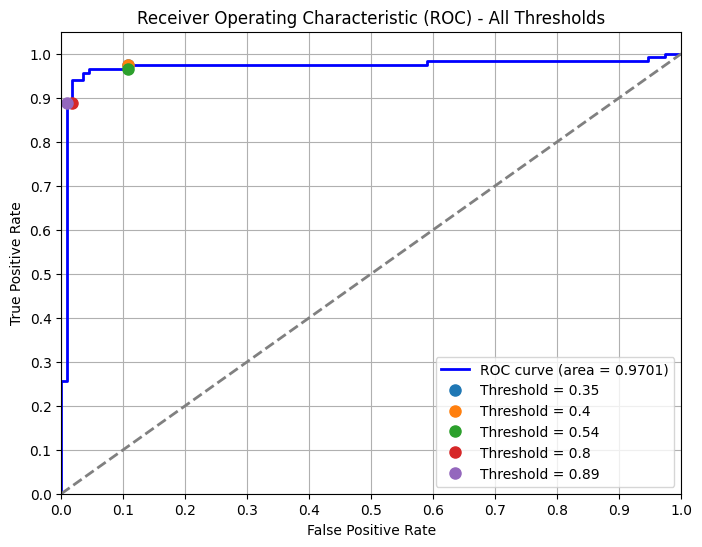

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, accuracy_score

# Assuming the model is already trained and we have X_test_scaled and y_test
# X_test_scaled: transformed test data
# y_test: true labels

# Get predictions from the model
Y_pred_prob = model.predict(X_test_scaled)

# Flatten the predictions
Y_pred_prob = Y_pred_prob.flatten()

# List of thresholds to test
thresholds = [0.35, 0.4, 0.54, 0.8, 0.89]

# Plot confusion matrices and ROC curve for each threshold
for threshold in thresholds:
    # Convert predictions to binary classification at the specified threshold
    Y_pred = (Y_pred_prob > threshold).astype(int)
    
    # Calculate F-measure
    f1 = f1_score(y_test, Y_pred)
    print(f'Threshold: {threshold:.2f}, F-measure: {f1:.4f}')
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, Y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_test, Y_pred)
    sensitivity = tp / (tp + fn)  # Sensitivity or Recall
    specificity = tn / (tn + fp)  # Specificity
    fpr_value = fp / (fp + tn)  # False Positive Rate

    print(f'Threshold: {threshold:.2f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (TPR/Recall): {sensitivity:.4f}')
    print(f'Specificity (TNR): {specificity:.4f}')
    print(f'False Positive Rate (FPR): {fpr_value:.4f}')
    print(f'F-measure: {f1:.4f}')
    print('-' * 30)
    
    # Plot confusion matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_test, Y_pred), 
                cmap=sns.dark_palette("#69d", 10, reverse=True, as_cmap=True), 
                annot=True, 
                linewidths=1, 
                fmt=".0f")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Threshold = {threshold})')
    plt.show()

# Calculate ROC curve and AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with points at each threshold
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Add points at each threshold
for i, threshold in enumerate(thresholds):
    # Find the closest TPR and FPR values for the specified threshold
    index = np.argmin(np.abs(roc_thresholds - threshold))
    plt.plot(fpr[index], tpr[index], 'o', label=f'Threshold = {threshold}', markersize=8)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - All Thresholds')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend(loc="lower right")
plt.grid(True)  # Add grid for clarity
plt.show()


In [68]:
print(np.bincount(y_test))

[112 117]


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       112
           1       0.98      0.91      0.94       117

    accuracy                           0.94       229
   macro avg       0.95      0.94      0.94       229
weighted avg       0.95      0.94      0.94       229



In [56]:
Y_pred


array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1])

In [58]:
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1])

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Overall Metrics (Threshold = 0.8):
Accuracy: 0.9432
Precision: 0.9815
Sensitivity (Recall): 0.9060
Specificity: 0.9821
F1-score: 0.9422
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       112
           1       0.98      0.91      0.94       117

    accuracy                           0.94       229
   macro avg       0.95      0.94      0.94       229
weighted avg       0.95      0.94      0.94       229



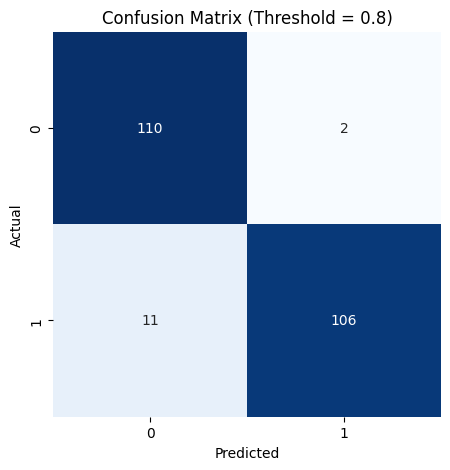

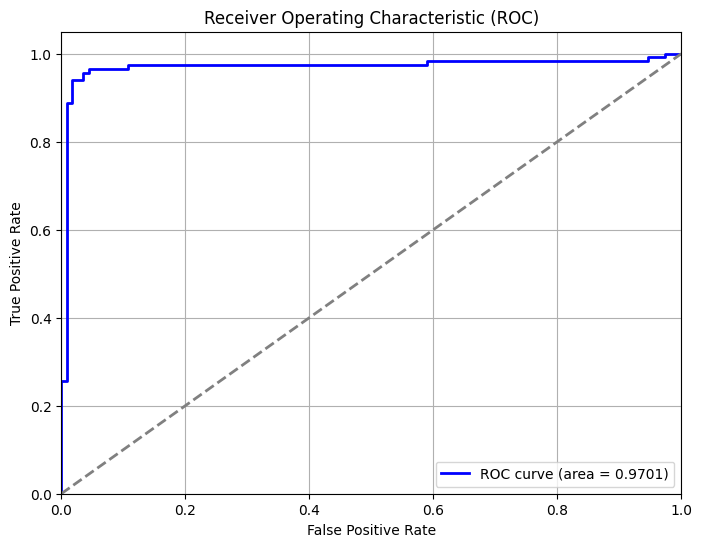

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc, accuracy_score, precision_score, recall_score, classification_report

# Assuming model, X_test_scaled, and y_test are already defined

# Get predicted probabilities from the model
Y_pred_prob = model.predict(X_test_scaled)

# Flatten the predicted probabilities if necessary
Y_pred_prob = Y_pred_prob.flatten()

# Determine the best threshold (e.g., you can choose 0.5 or another value based on your application)
best_threshold = 0.8

# Convert predicted probabilities to binary classification at the specified threshold
Y_pred = (Y_pred_prob > best_threshold).astype(int)

# Calculate overall metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)  # This is the sensitivity
f1 = f1_score(y_test, Y_pred)

# Function to calculate specificity
def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn / (tn + fp)

# Confusion matrix and specificity
cm = confusion_matrix(y_test, Y_pred)
spec = specificity(cm)

# Print overall metrics
print(f'Overall Metrics (Threshold = {best_threshold}):')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Sensitivity (Recall): {recall:.4f}')
print(f'Specificity: {spec:.4f}')
print(f'F1-score: {f1:.4f}')
print('-' * 30)

# Print detailed classification report
print(classification_report(y_test, Y_pred))

# Plot confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, Y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold = {best_threshold})')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, roc_thresholds = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
